<a href="https://colab.research.google.com/github/ghdakrk/computr_vision/blob/main/4_featuring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

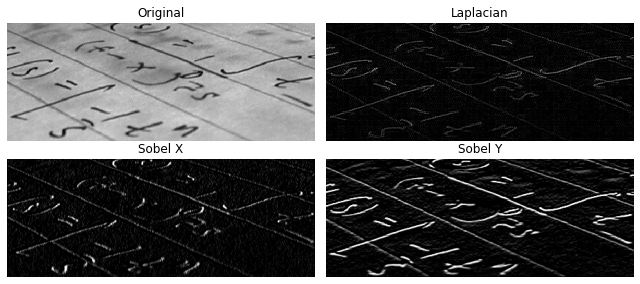

In [1]:
from skimage.data import text
import cv2
import matplotlib.pyplot as plt

img = text()
sobelx = cv2.Sobel(img, cv2.CV_8U, 1, 0, ksize=3)
sobely = cv2.Sobel(img, cv2.CV_8U, 0, 1, ksize=3)
laplacian = cv2.Laplacian(img, cv2.CV_8U)
plt.figure(figsize=(9, 4))
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis("off")
plt.subplot(2, 2, 2)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian')
plt.axis("off")
plt.subplot(2, 2, 3)
plt.imshow(sobelx, cmap='gray')
plt.title('Sobel X')
plt.axis("off")
plt.subplot(2, 2, 4)
plt.imshow(sobely, cmap='gray')
plt.title('Sobel Y')
plt.axis("off")
plt.tight_layout()
plt.show()

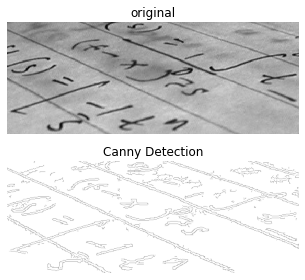

In [2]:
img = text()
edges = cv2.Canny(img, 50, 100)
plt.subplot(2, 1, 1)
plt.imshow(img, cmap="gray")
plt.title("original")
plt.axis('off')
plt.subplot(2, 1, 2)
plt.imshow(edges, cmap="Greys", alpha=0.3)
plt.axis('off')
plt.title("Canny Detection")
plt.tight_layout()
plt.show()

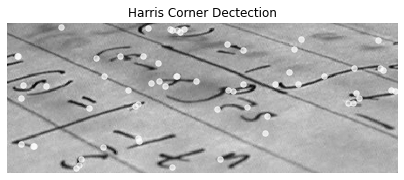

In [3]:
import numpy as np

dst = cv2.cornerHarris(img, 2, 3, 0.24)
# thresholding
ret, dst = cv2.threshold(dst, 0.001 * dst.max(), 1, 0)
x, y = np.nonzero(dst)
plt.figure(figsize=(7,7))
plt.title("Harris Corner Dectection")
plt.axis("off")
plt.imshow(img, cmap="gray")
plt.scatter(y, x, s=30, c="w", alpha=0.7)
plt.show()

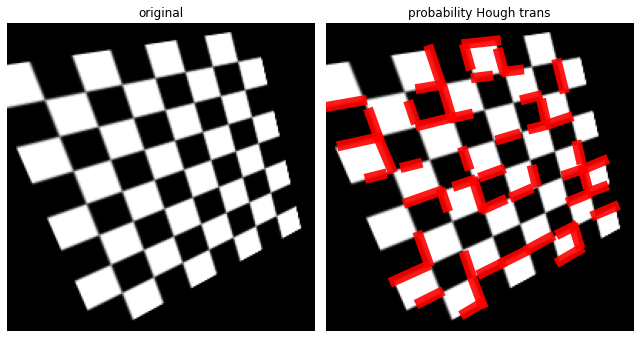

In [4]:
from skimage.data import checkerboard
img = checkerboard()
rows, cols = img.shape
pts1 = np.float32([[25, 25], [175, 25], [25, 175], [175, 175]])
pts2 = np.float32([[25, 50], [150, 25], [75, 175], [175, 125]])
H = cv2.getPerspectiveTransform(pts1, pts2)
img = cv2.warpPerspective(img, H, (cols, rows))
edges = cv2.Canny(img, 100, 150, apertureSize=3)
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 50, 50, 8)
plt.figure(figsize=(9, 7))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap="gray")
plt.title("original")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(img, cmap="gray")
plt.axis("off")
for i in range(len(lines)):
    for x1, y1, x2, y2 in lines[i]:
        plt.plot([x1, x2], [y1, y2], c='r', lw=10, alpha=0.9)
plt.title("probability Hough trans")
plt.tight_layout()
plt.show()


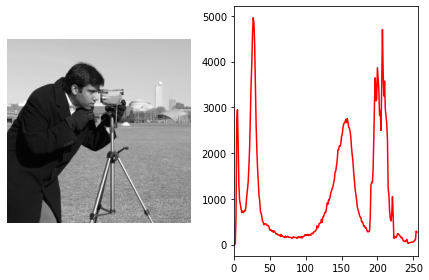

In [5]:
# image histogram
# 사진의 밝기 픽셀 히스토그램
from skimage.data import camera
img = camera()
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.subplot(121)
plt.imshow(img, "gray")
plt.axis("off")
plt.subplot(122)
plt.plot(hist, color='r')
plt.xlim([0, 256])
plt.tight_layout()
plt.show()